# P53 - DMS Analyse
#### von Frido Petersen, Dario Prifti, Maximilian Fidlin und Enno Schäfer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import data_exploration as de
import data_cleanup as dc
import functions as fun
import Documentation as doc
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering

In [2]:
# All used data sets
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
gia_null_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv')
gia_wt_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
kot_hum: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Kotler_2018.csv')

aa = pd.read_csv('../DMS_data/aminoacids.csv')

## Grobe Struktur:
1) Data Cleanup: wir hatten diese Daten, das und das haben wir damit gemacht, so und so sehen unsere Daten jetzt aus
    (i) NA - remove
    (ii) Z - Transformierung
    (iii) Normalisierung
` `
` `
2) Data Exploration
    (i) Distanzmatrix
    (ii) Clustering
    (iii) weitere Clustering-Methoden
    (iv) Zusätzliche AS Daten
` `
` `
3) T-tests

## Data cleanup
 *Welche Funktionen habt ihr benutzt und warum (also warum haben wir ne z-transformation gemacht und nicht einfach direkt ne Normalisierung der Werte auf einen bestimmten Zahlenbereich?) Schreibt mal bitte auch eure Funktionen mit rein (also euren Code) und all die Sachen, die ihr außerhalb davon herausgefunden habt (also was ihr so rumgegoogelt und herausgefunden habt)*

After we finished cleaning our data, we decided to transform the data into a new, more compact format.
In this new data frame the rows resemble the original AA sequence and the rows represent the exchange with a specific AA (e.g. A). The shown values are the DMS scores for the shown substitution. The NAs   shown for the exchanges where the old and new AA are the same, are changed to the value zero. With this transformed data set, further analyses are more easily to perform.

In [3]:
dc.rmv_na(dc.df_transform(gia_null_eto))

position_mut,1,2,3,4,5,6,7,8,9,10,...,384,385,386,387,388,389,390,391,392,393
AS_old,M,E,E,P,Q,S,D,P,S,V,...,M,F,K,T,E,G,P,D,S,D
AS_new,,,,,,,,,,,,,,,,,,,,,
A,-0.788753,-0.376597,-0.178116,-1.175946,-0.345754,-0.733648,0.577294,0.057062,0.110162,0.505744,...,1.087271,0.592288,1.342046,0.781405,1.238938,1.169208,1.478115,1.036380,0.542344,1.132786
C,-1.969077,-0.068750,0.335770,0.191526,0.249694,0.218392,0.325113,0.046357,0.059489,0.879340,...,1.048168,1.011005,1.153228,1.162982,1.105490,1.394445,1.040421,1.202961,1.525051,0.458008
D,0.536895,0.180007,0.223665,0.431286,0.596059,0.364607,0.000000,0.404817,0.079720,0.951393,...,0.976694,1.248257,0.906721,1.104929,1.017745,0.959517,1.072748,0.000000,1.493992,0.000000
E,1.227243,0.000000,0.000000,0.752063,0.154363,0.451159,0.437353,0.477276,-0.026962,0.843035,...,1.396801,0.954702,0.514636,1.260646,0.000000,0.524010,1.000880,1.057979,1.592430,0.701935
F,0.536895,0.285277,-0.163861,0.143955,0.183432,0.022895,0.630453,-0.113914,-0.032559,0.631839,...,1.355672,0.000000,1.458921,1.086308,1.395992,0.678716,1.456029,1.748360,1.259045,1.576765
G,-1.053827,-1.136268,-1.231009,0.480629,0.672144,0.618498,0.042125,0.322946,0.149293,0.477052,...,1.601316,0.431552,0.694353,1.173473,0.887612,0.000000,0.547189,0.805634,1.739032,0.889272
H,-2.003616,0.018802,0.166849,0.346323,0.473020,0.351703,0.512018,0.386434,0.168393,0.618341,...,1.060380,1.696196,1.042860,1.040709,1.450329,1.054661,0.754332,0.979709,1.223101,1.077643
I,-1.370065,0.265437,-0.079066,0.655922,0.443878,0.504212,0.192564,0.072021,0.306439,0.494835,...,0.872244,0.984972,1.002368,0.885588,1.574588,1.302351,1.535477,1.636037,1.337679,1.860547


Dario:

Max: Wir haben probiert Patientendaten zu bekommen, aber wir haben die nicht bekommen

## Data exploration
*Was sind die Ergebnisse, auf die ihr gekommen seid? Also implementierte Funktionen mit einfügen, um dann plotten zu können*

First, we wanted to get a feel for the mean scores for each substitution calculated from the whole length of the p53 protein.

In [4]:
dc.rmv_na(de.mean_substitutions(gia_null_eto)) #--> hier noch nicht z-transformiert, normalisiert, etc...

AS_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.398729,0.515101,0.457134,0.381672,0.012152,0.107080,0.322948,0.181169,0.010173,0.290941,0.243262,-0.118068,0.124772,0.116215,0.280331,0.476545,0.486577,0.223571,0.370961
C,-0.984361,0.000000,-1.510386,-1.416325,-0.191154,-0.942953,-1.161374,-0.309752,-1.349437,-1.293370,-0.735466,-0.871731,-1.376094,-0.883989,-0.514196,-0.447143,-0.752822,-0.561304,-0.678823,-0.587628
D,0.336420,0.364490,0.000000,0.538215,0.343919,0.203707,0.489931,0.101190,0.321578,0.181842,0.021296,0.259362,-0.054858,0.215632,-0.151917,0.347274,0.246090,0.173693,0.364983,0.389608
E,0.439452,0.382776,0.376245,0.000000,0.349576,0.067008,0.507057,0.371153,0.112546,0.306692,0.375952,0.362416,-0.331368,0.437464,-0.094437,0.272662,0.433548,0.375813,0.214914,0.379793
F,-0.689239,-0.378202,-1.367940,-0.864939,0.000000,-0.744887,-0.501397,-0.138207,-0.800865,0.000087,0.048709,-0.793803,-0.833767,-0.505582,-0.768096,-0.607131,-0.852016,-0.389713,-0.112035,0.159711
G,0.269993,0.523857,0.214476,0.018696,0.199421,0.000000,0.287239,-0.068060,0.080282,0.012710,0.233815,0.335321,-0.176705,0.319435,-0.072564,0.217142,0.137428,0.222302,-0.286193,0.127274
H,0.068617,0.244989,-0.059473,-0.118440,0.304758,-0.290995,0.000000,-0.201286,-0.285608,0.012453,0.339755,0.453583,-0.435685,0.313392,0.042533,-0.135786,-0.556795,-0.016774,0.313742,0.405657
I,-1.301357,-0.320707,-1.656635,-1.631776,-0.231583,-1.367628,-1.444026,0.000000,-1.430235,0.064510,0.607118,-0.923276,-1.309344,-1.550460,-1.285973,-0.986439,-0.416796,0.413857,-1.451584,-1.333389
K,0.564866,0.674043,0.163895,0.157561,0.335243,0.352034,0.540112,0.516667,0.000000,0.582710,0.639539,0.391722,0.327485,0.355389,0.278626,0.494709,0.537629,0.611187,0.388272,0.460607


In [5]:
# Distanzmatrix (DMS-Scores)

In [6]:
de.aa_distance_matrix(aa)

Letter,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Letter,,,,,,,,,,,,,,,,,,,,
A,0.000000,4.488450,5.141887,5.113540,6.582025,3.143112,5.692482,4.367354,6.511845,4.494569,5.582288,4.373885,4.914318,4.743906,8.627119,2.322121,3.029932,3.066804,8.756137,6.715943
C,4.488450,0.000000,5.887621,5.987436,6.550690,6.189879,6.167777,5.448762,7.499541,5.537362,4.191089,5.885445,5.799861,5.930653,9.119700,5.025513,4.908385,4.821031,9.087514,6.962933
D,5.141887,5.887621,0.000000,2.084842,6.806684,6.420931,5.583834,6.449012,6.882246,6.481627,6.722432,3.316229,6.486050,3.996827,8.647505,3.593842,3.442810,5.759462,9.415581,6.267352
E,5.113540,5.987436,2.084842,0.000000,5.972984,6.556874,5.252811,5.314198,5.910873,5.285282,5.827931,3.309345,6.062780,2.969967,7.699967,3.766267,3.241029,4.880634,7.724562,4.882555
F,6.582025,6.550690,6.806684,5.972984,0.000000,8.236844,4.378176,3.618973,5.273173,3.554533,4.527908,5.492339,6.445896,4.605753,6.948226,6.300665,4.979884,4.224741,5.238993,2.529926
G,3.143112,6.189879,6.420931,6.556874,8.236844,0.000000,7.324768,6.415528,8.054460,6.329089,7.352325,5.746366,4.490995,6.132605,9.869681,3.940073,4.877878,4.915951,10.380417,8.446333
H,5.692482,6.167777,5.583834,5.252811,4.378176,7.324768,0.000000,4.996267,3.484290,4.990372,5.294042,3.305547,6.376422,3.053031,4.429682,5.090886,4.196107,4.847401,6.841023,4.620660
I,4.367354,5.448762,6.449012,5.314198,3.618973,6.415528,4.996267,0.000000,4.979261,0.646961,3.790243,5.166471,5.360322,4.160533,7.102706,4.835043,3.872121,1.525433,5.392654,3.769073
K,6.511845,7.499541,6.882246,5.910873,5.273173,8.054460,3.484290,4.979261,0.000000,4.839995,5.472772,4.523440,7.018856,3.542632,3.140138,5.903006,4.965696,5.150640,6.411042,4.716122


-> Gibt uns die Abstände der AS zueinander basierend auf den DMS-Scores bei Austausch von AS. Bin mir leider nicht sicher ob die Abstände der neuen oder alten AS zueinander berechnet werden. Und check auch nicht ganz wieso das nur mit der transponierten Matrix funktioniert

Dario: My goal was to retrieve informations regarding the comparability of our different datasets

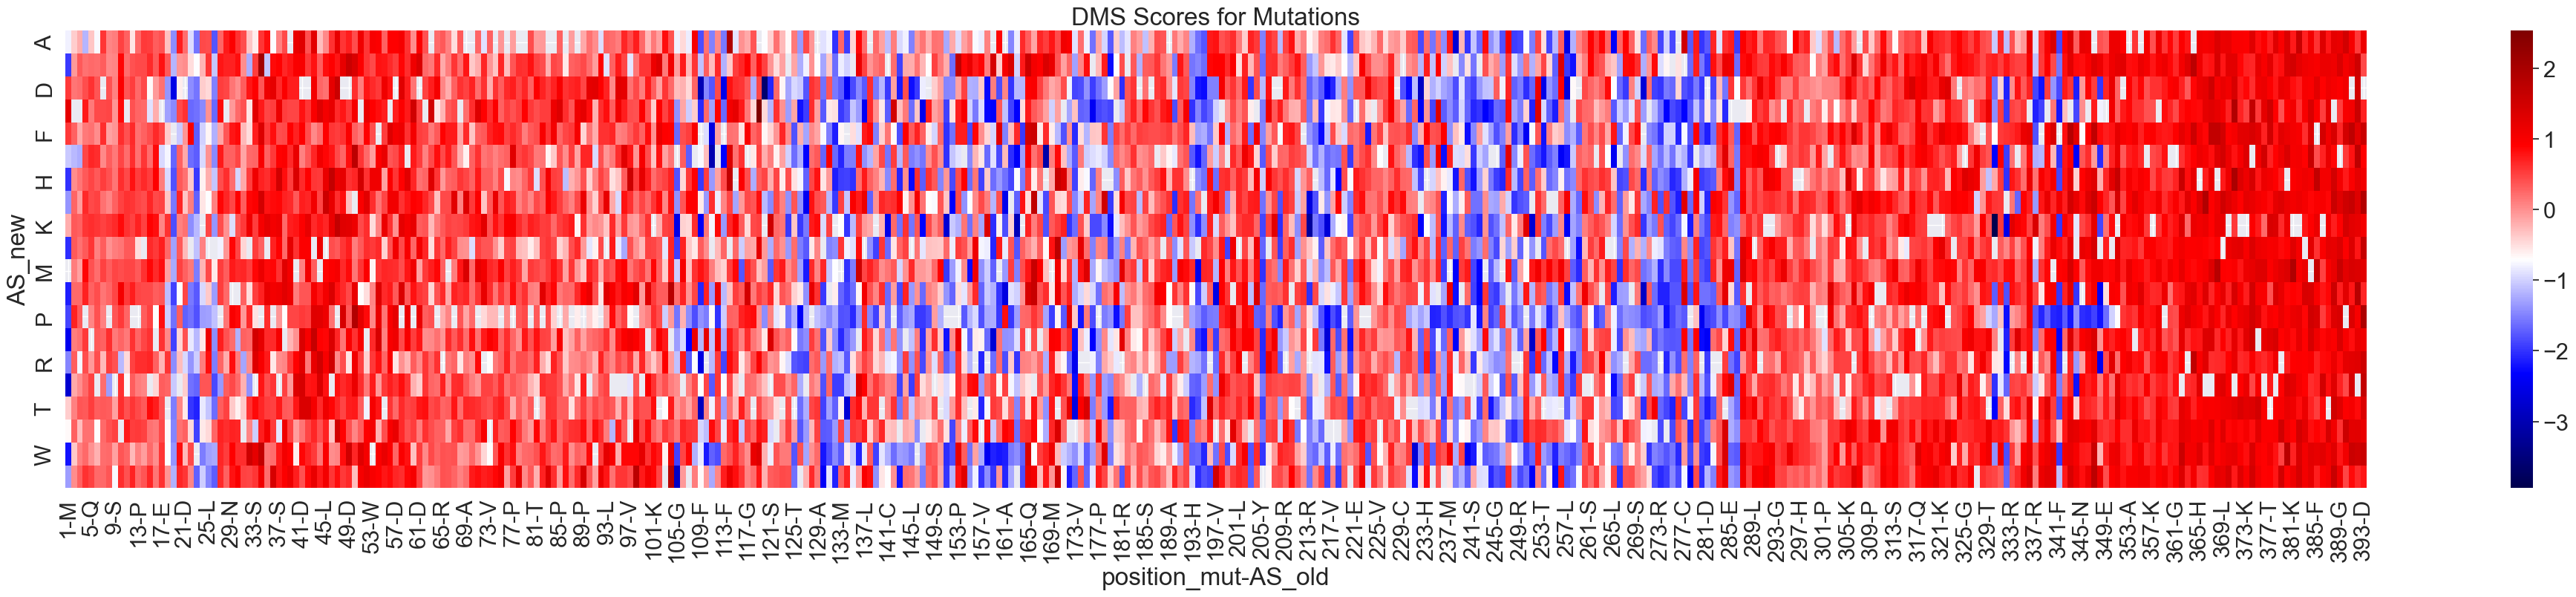

In [7]:
# giacomelli null etoposide
fun.hmap(doc.gia_null_eto_auf)

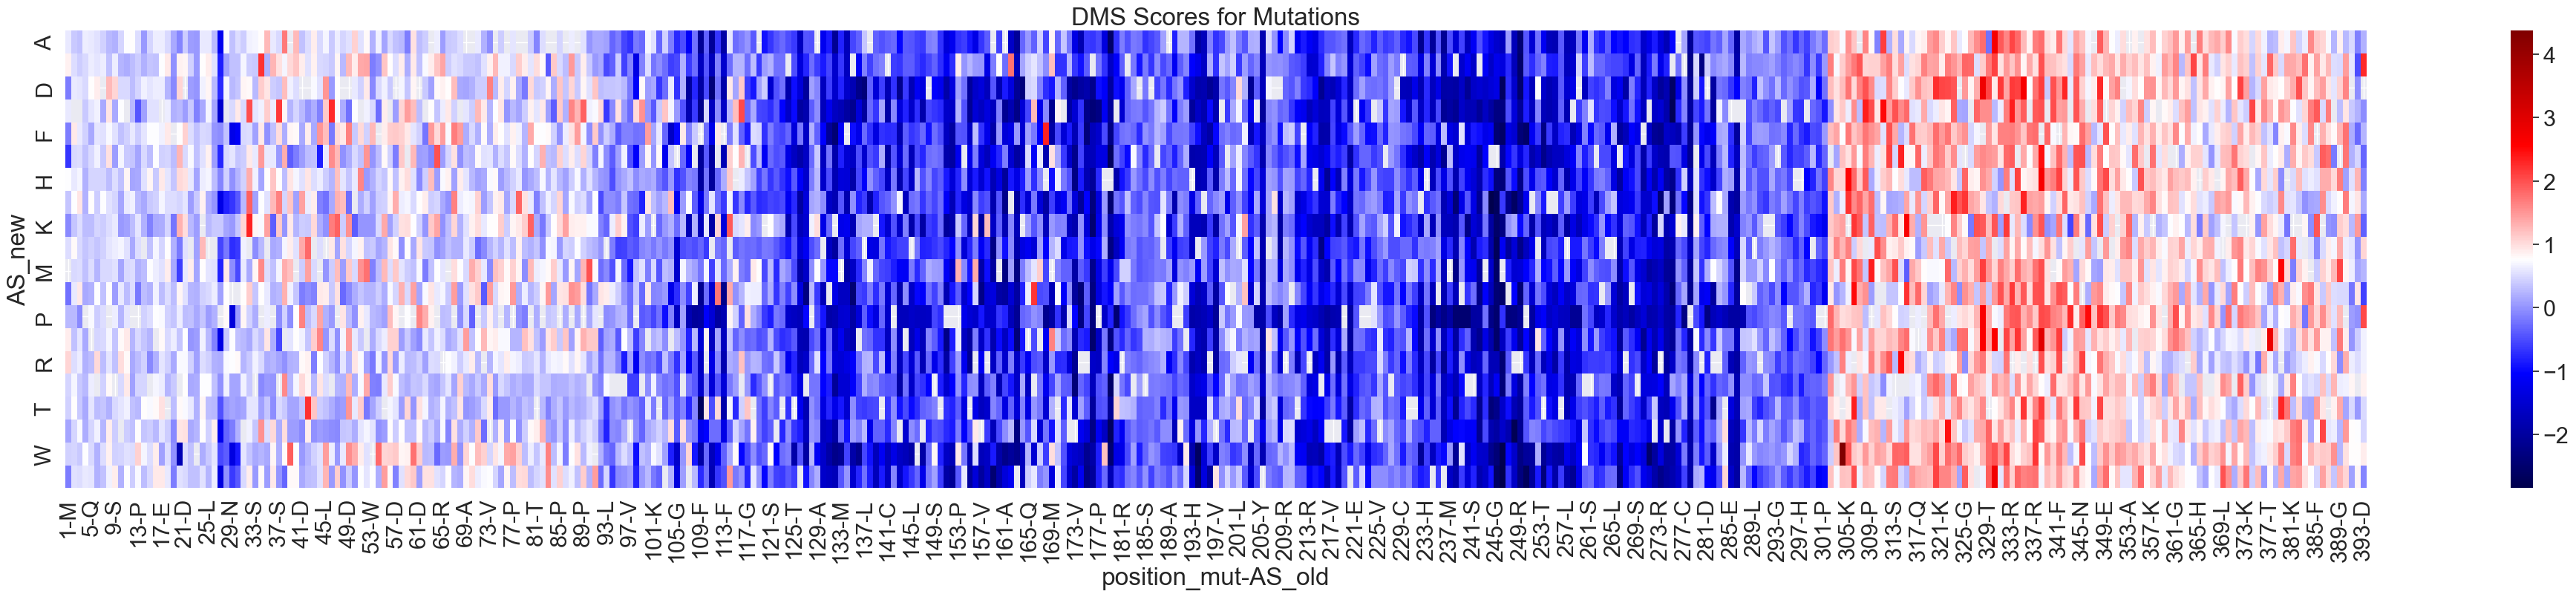

In [8]:
# giacomelli wildtype nutlin
fun.hmap(doc.gia_wt_nut_auf)

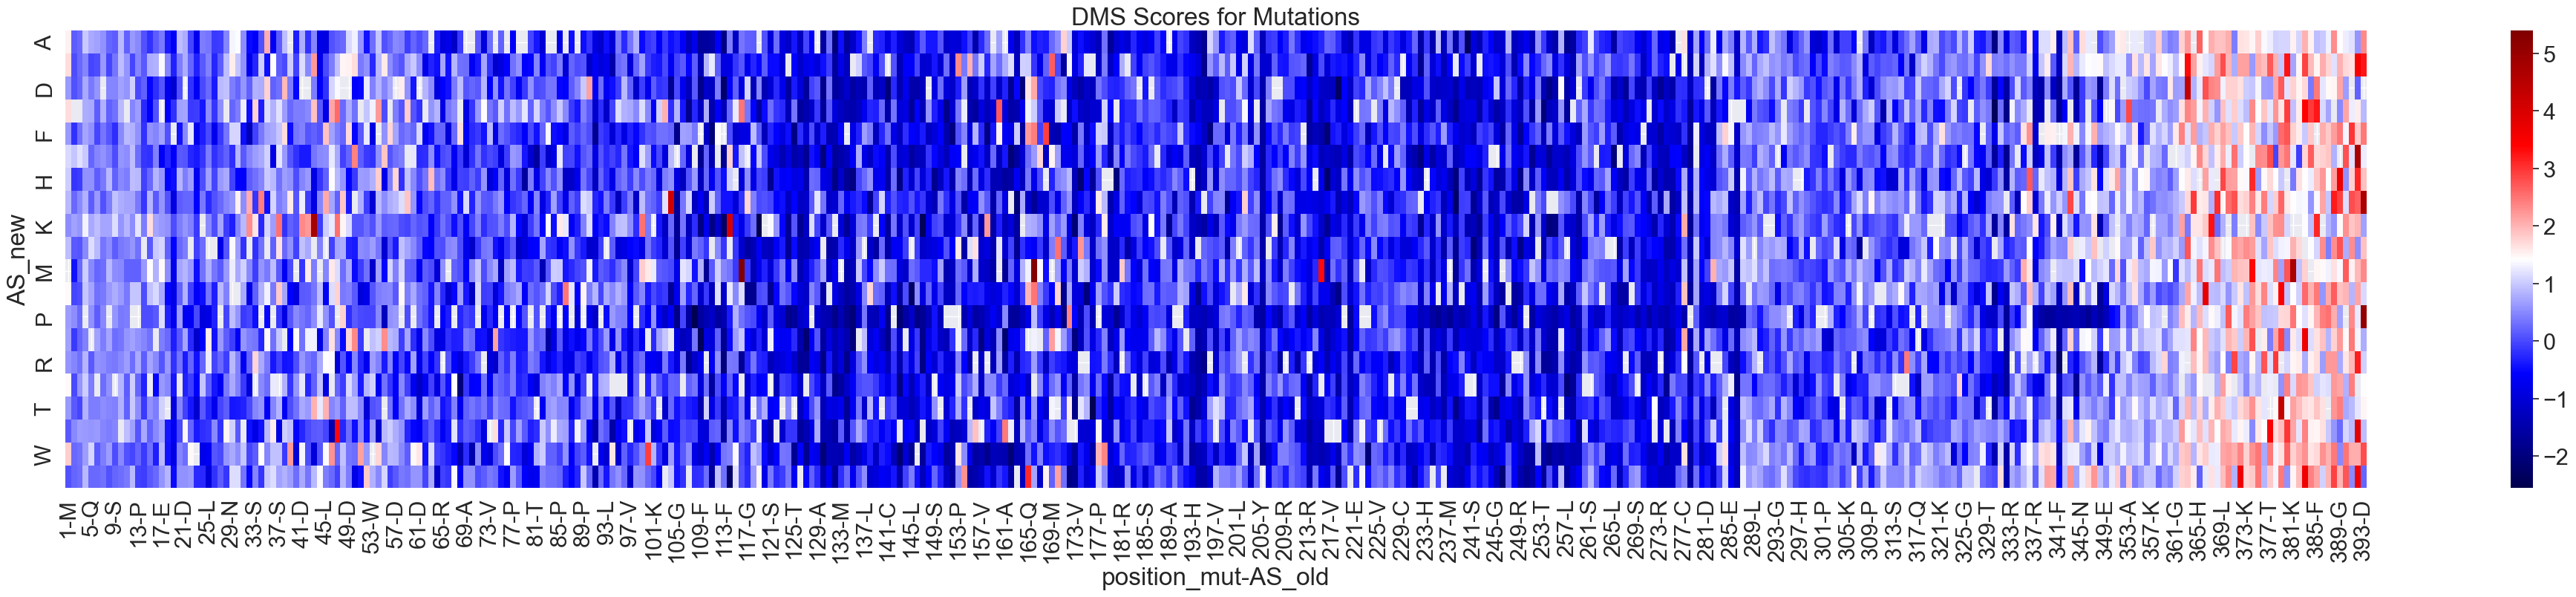

In [9]:
# giacomelli null nutlin
fun.hmap(doc.gia_null_nut_auf)

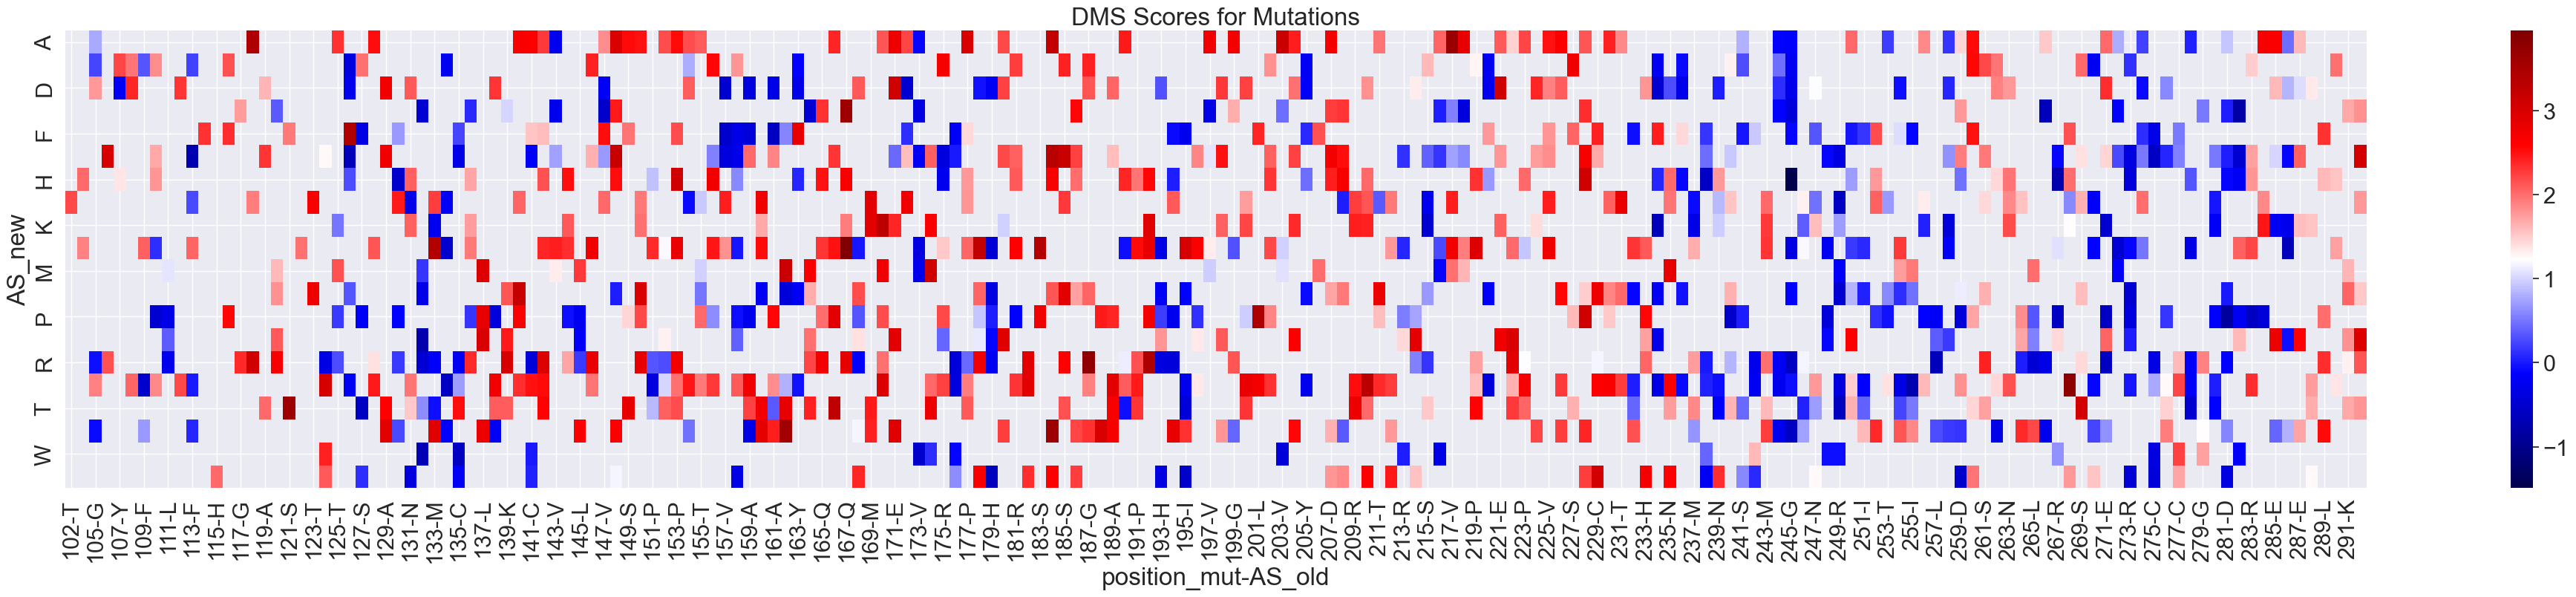

In [10]:
# kotler
fun.hmap(doc.kot_hum_auf)

In [11]:
# These heatmaps show different trends:
# What we need to consider is that the Kotler dataset only covers a range of amino acids from x to y. While the "Giacomelli wildtype nutlin" and "Giacomelli null nutlin" datasets exhibit some similarities in terms of trends and values, the same cannot be said when comparing them to the "Giacomelli null etoposide" dataset. This disparity is likely due to the use of different p53 activating agents, namely nutlin-3 and etoposide. One notable observation across all datasets is that amino acids in the range of approximately 100-300 generally display a negative effect caused by mutations. This could indicate a specific region that is evolutionary conserved an perfected. Additionally, the Kotler dataset exhibits a scarcity of values, which should be taken into consideration for future work.

In [12]:
# In addition to visually comparing the datasets, I wanted to investigate whether the datasets share positions in the amino acid sequence where the sum of all DMS scores is the lowest. This would indicate that these specific locations are particularly conserved.

In [13]:
# The 5 lowest values in the "Giacomelli null etoposide" dataset
dc.low_val(gia_null_eto, 5)

,,Sum
position_mut,AS_old,
280,R,-33.450339
281,D,-33.446227
278,P,-32.028606
205,Y,-31.805002
275,C,-31.252744


In [14]:
# The 5 highest values in the "Giacomelli null etoposide" dataset
dc.high_val(gia_null_eto, 5)

                           Sum
position_mut AS_old           
392          S       23.640782
388          E       23.569597
393          D       23.458339
391          D       22.853878
374          G       22.718939


In [15]:
# The lowest Values (-> most affected by mutation) are found in:
doc.lowest_vals.head(20)

,Name of the Dataset,Location of lowest DMS_score sum,Sum,Original AA
0,Giacomelli Null Etoposide,280,-33.450339,R
1,Giacomelli NULL Nutlin,205,-27.798457,Y
2,Giacomelli WT Nutlin,245,-41.124490,G
3,Kotler,245,-4.352254,G


In [16]:
#In general, we can also take a look at a flexible number of the most negative locations and take a look at them next to eachother
doc.lowest_vals_gesammelt.head(5)

,Giacomelli NULL Etoposide location,Giacomelli NULL Etoposide sums,Giacomelli NULL Nutlin location,Giacomelli NULL Nutlin sums,Giacomelli WT Nutlin location,Giacomelli WT Nutlin sums,Kotler location,Kotler sums
0,280,-33.450339,205,-27.798457,245,-41.124490,245,-4.352254
1,281,-33.446227,278,-27.467959,249,-39.537161,273,-1.998387
2,278,-32.028606,132,-27.446469,179,-37.730973,132,-1.894587
3,205,-31.805002,238,-26.371507,278,-37.679146,179,-1.892910
4,275,-31.252744,143,-25.140772,176,-37.650754,249,-1.866202


Max:

Enno:

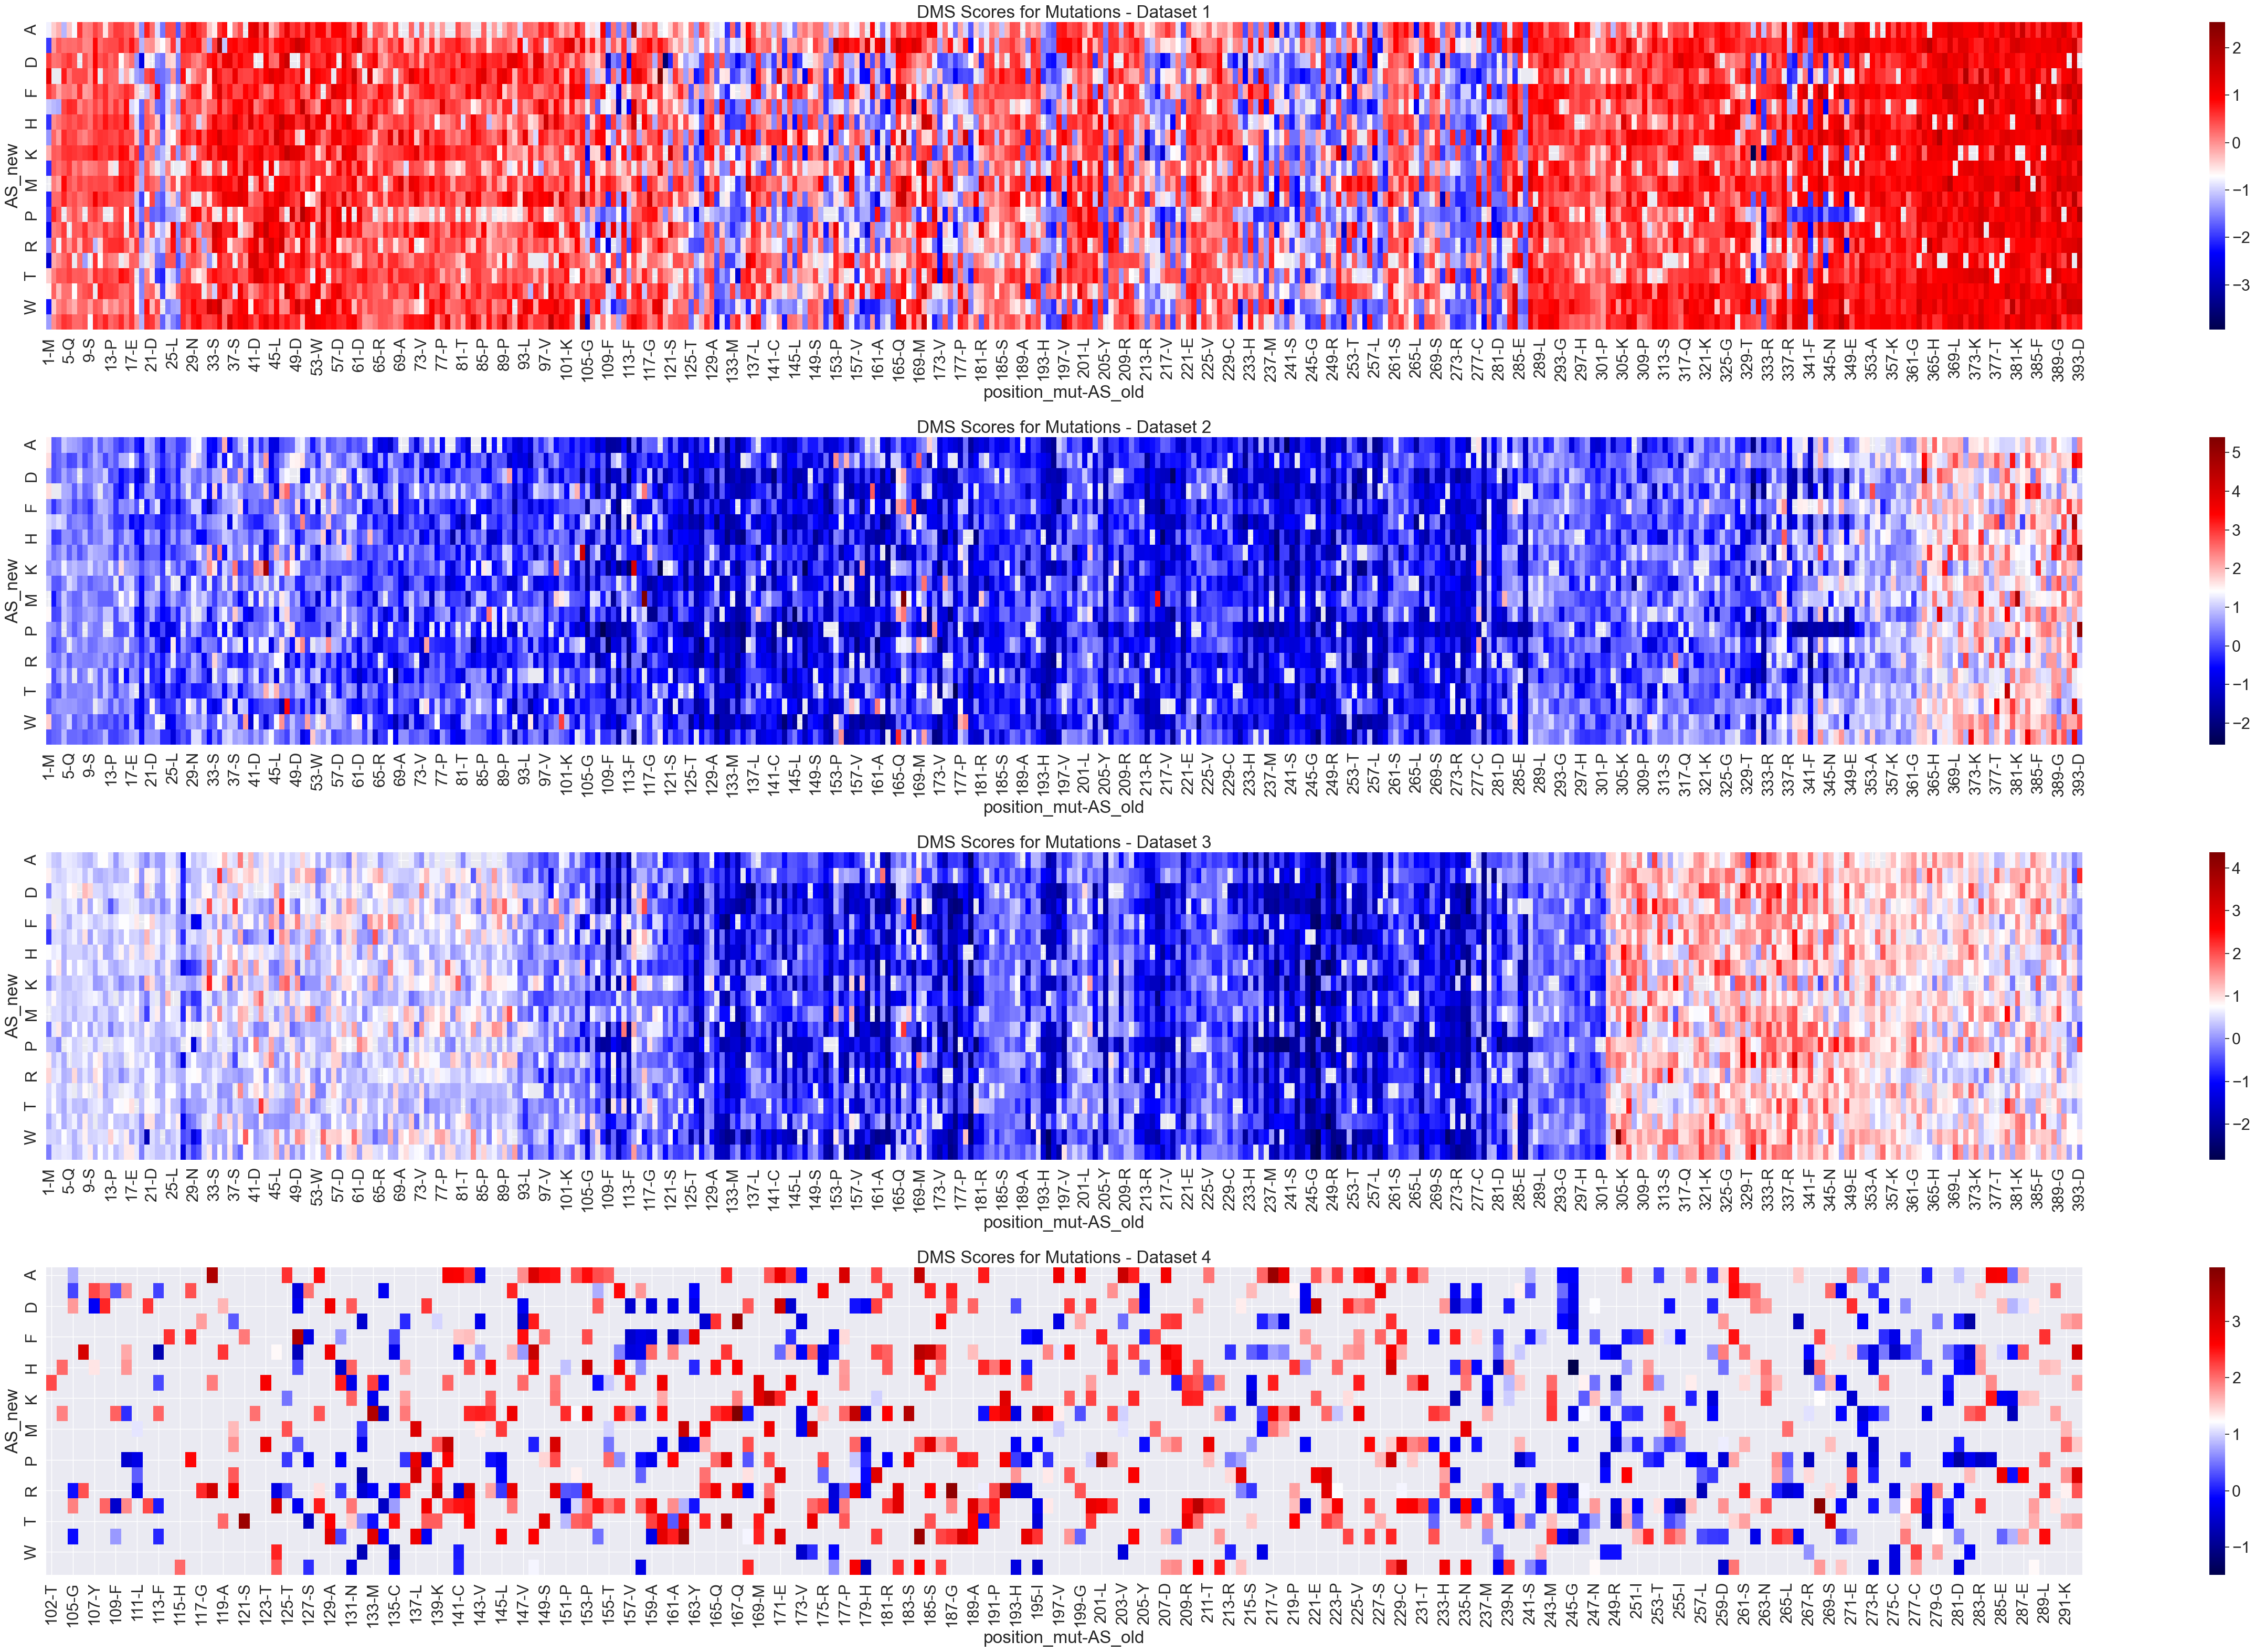

In [19]:
fun.multiple_hmap(doc.gia_null_eto_auf, doc.gia_null_nut_auf, doc.gia_wt_nut_auf, doc.kot_hum_auf)